<a href="https://www.kaggle.com/code/maxigaarp/c2-operaciones-en-bd?scriptVersionId=133852903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importamos librerias

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(dplyr)

## Opcion 1 (ocupa la conexión a internet del notebook)

Leemos la base de datos de IMDB (https://www.imdb.com/interfaces/). Usemos la función download.file:
 - download.file(URL, direccion_descarga)

In [ ]:
download.file("https://datasets.imdbws.com/title.basics.tsv.gz", "title.basics.tsv.gz")

Notemos que es un archivo ".tsv.gz". Para abrirlo podemos buscar en internet, nos dara que debemos usar la funcion gzfile y luego la funcion read_tsv

In [ ]:
?read_tsv

In [ ]:
read_tsv(gzfile("title.basics.tsv.gz"))

In [ ]:
peliculas <- as.data.frame(read_tsv(gzfile("title.basics.tsv.gz"), na = c("", "NA", "\\N")))

## **Opcion 2 (para la gente que no le permite descargar el archivo)**

El dataset se encuentra en Kaggle por lo que se ha agregado previamente a los conjuntos de datos que se ocuparan en el notebook. Gracias a esto podemos cargar el archivo directamente.

In [3]:
peliculas<- read_tsv("/kaggle/input/imdb-dataset/title.basics.tsv/data.tsv", na = c("", "NA", "\\N"))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 9922854 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): tconst, titleType, primaryTitle, originalTitle, genres
dbl (4): isAdult, startYear, endYear, runtimeMinutes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(peliculas)

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
tt0000001,short,Carmencita,Carmencita,0,1894,NA,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NA,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NA,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,NA,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NA,1,"Comedy,Short"
tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NA,1,Short


# Proyección

Usamos select para seleccionar columnas.

In [ ]:
nombres <- c("tconst","primaryTitle","startYear","genres")

In [ ]:
select(peliculas, c("tconst","primaryTitle","startYear","genres"))

El codigo anterior toma la tabla "peliculas" y selecciona solo las columnas "tconst","primaryTitle","startYear" y "genres". Por otro lado si en el argumento de columnas escribimos por ejemplo:

In [ ]:
 select(peliculas,-c("genres"))

Esto me selecciona todas las columnas EXCEPTO "genres"

# Filtros

Necesitamos filtrar los datos que no deberian estar dentro de la base de datos de peliculas

**Importante** ¿Qué datos tienen las columnas de la base de datos?

* Podemos ver la columna "titleType", pero esto demora y entrega demasiados valores. Mejor usar la funcion "unique" que entrega los valores **distintos**

In [ ]:
peliculas$titleType

In [ ]:
unique(peliculas[["titleType"]])

Podemos filtrar según alguno de los titleType, por ejemplo: "movie" o "tvMovie"

In [ ]:
filter(peliculas,titleType=="movie")

In [ ]:
filter(peliculas,titleType=="tvMovie")

Otra opcion para filtrar es usar condiciones mediante vectores booleanos (vectores de verdaderos y falsos).

In [ ]:
peliculas[peliculas["titleType"]=="movie",]

### Apliquemos el filtro y selección secuencialmente.

Podemos usar el operador pipe ("%>%") para agregar operaciones sucesivas a nuestro dataframe. 

Por ejemplo, en el siguiente codigo, al dataframe peliculas, le aplicamos un filtro (que el tipo de titulo sea "movie" o "tvMovie") y finalmente seleccionamos las columnas: "tconst","primaryTitle","startYear","genres". Todo esto lo asignamos a la variable "df"

In [4]:
df <- peliculas%>%
        filter((titleType=="movie")| (titleType=="tvMovie")) %>%
        select( c("tconst","primaryTitle","startYear","genres"))

In [ ]:
head(df)

# Union

Con union podemos unir dataframes o tablas con nombres (y tipo de datos) en común. 

Creemos los dataframes de movies y tvMovies

In [ ]:
movies_df <- filter(peliculas,titleType=="movie")
head(movies_df)

In [ ]:
tvMovies_df <- filter(peliculas,titleType=="tvMovie")
head(tvMovies_df)

Ahora union nos entrega la union (valga la redundancia) de estos dos dataframes

In [ ]:
union(filter(peliculas,titleType=="movie"), filter(peliculas,titleType=="tvMovie"))

En la union de movies_df y tv_movies_df, todas las primeras filas tienen titleType "movie" y las siguientes tienen solo filas con titleType "tvMovie".

Esto es casi igual que filtrar el dataframe según la condición de que el título sea "movie" o "tvMovie" (como lo hicimos en la sección pasada). Solo que, por un tema de el orden de las operaciones en ese caso las tuplas se nos entregarian desordenadas (ya que el filtro no ordena según titleType)

Tambien encontramos la funcion **rbind**, la diferencia es que esta ultima **no** elimina los valores repetidos, en cambio union si.

In [ ]:
rbind(df,df)

Tambien existe la funcion **cbind** en R que nos permite unir las bases de datos por las columnas, es decir, agregar atributos.

In [ ]:
cbind(df,df)

# Renombrar

Para renombrar atributos usamos la funcion rename de la forma:

    rename(dataframe,c('nombrenuevo'='nombreviejo'))
    
Con el siguiente codigo podemos cambiar el nombre de la columna "tconst" a "ID" y de "primaryTitle" a "Nombre"

In [ ]:
df <- rename(df,c('ID'='tconst', 'Nombre'='primaryTitle'))

Tambien podemos cambiar todos los nombres al mismo tiempo reasignando el vector de nombres de la tabla:

    names(dataframe) <- c("nombrenuevo_1", "nombrenuevo_2",..., "nombrenuevo_n")
    
Acá es necesario escribir todos los nombres de los atributos nuevos.

In [ ]:
names(df)

In [5]:
names(df) <- c("ID", "Nombre", "Agno", "Categoria")

In [ ]:
head(df)

# Producto Cruz

Necesitamos unir la base de datos de peliculas con los ratings de ellas. Por esto tenemos que leer la base ratings

In [19]:
ratings <- read_tsv('/kaggle/input/imdb-dataset/title.ratings.tsv/data.tsv', na = c("", "NA", "\\N"))

Rows: 1318428 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): tconst
dbl (2): averageRating, numVotes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(ratings)

### Asignamos el dataframe df a la variable peliculas2

Para que el nombre de la tabla sea explicativo de los datos que contiene

In [7]:
peliculas2 <- df

In [ ]:
peliculas2[1:5,]

In [ ]:
ratings[1:10,]

Usamos la funcion crossing podemos obtener el producto cruz de las bases de datos, si luego filtramos podemos obtener el comando join.

In [ ]:
crossing(peliculas2[1:1000,], ratings[1:1000,]) %>% filter(ID==tconst)

# Joins

Existen 4 tipos de join
 - Inner/natural join
 - Outer/full join
 - Left join
 - Right join

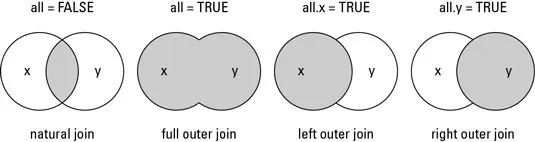

In [ ]:
head(peliculas2)

In [ ]:
head(ratings)

Hacemos el join a traves de el "ID" (para la tabla peliculas2) y a traves de "tconst" para la tabla ratings. 

inner_join nos deja con toda la lista de peliculas a las cuales puede asociarle un rating, es decir el ID se encuentra tanto en la tabla peliculas2 como en la tabla ratings.

In [ ]:
inner_join(peliculas2, ratings, c("ID"="tconst"))

Left join nos deja con toda la lista de peliculas **aunque** no encuentre el rating

In [ ]:
left_join(peliculas2, ratings, c("ID"="tconst"))

De modo reciproco right_join nos deja con toda la lista de ratings **aunque** no encuentre la pelicula

In [ ]:
right_join(peliculas2, ratings, c("ID"="tconst"))

Finalmente, full_join nos deja la lista de ratings y peliculas, incluyendo las peliculas a las cuales no les encontro el rating y tambien los ratings a los cuales no les encontro la informacion de la pelicula.

In [ ]:
full_join(peliculas2, ratings, c("ID"="tconst"))

## Reasignamos la tabla peliculas 2 para que ahora contenga los ratings

In [ ]:
peliculas2<-inner_join(peliculas2, ratings, c("ID"="tconst"))
head(peliculas2)

In [26]:
??full_join

R Information

Help files with alias or concept or title matching ‘full_join’ using
regular expression matching:


dbplyr::join.tbl_sql    Join SQL tables
  Aliases: full_join.tbl_lazy
dplyr::mutate-joins     Mutating joins
  Aliases: full_join, full_join.data.frame
fuzzyjoin::difference_join
                        Join two tables based on absolute difference
                        between their columns
  Aliases: difference_full_join
fuzzyjoin::distance_join
                        Join two tables based on a distance metric of
                        one or more columns
  Aliases: distance_full_join
fuzzyjoin::fuzzy_join   Join two tables based not on exact matches, but
                        with a function describing whether two vectors
                        are matched or not
  Aliases: fuzzy_full_join
fuzzyjoin::genome_join
                        Join two tables based on overlapping genomic
                        intervals: both a
  Aliases: genome_full_join
fuzzyjoin::geo_

Tambien eliminamos la columna numVotes y renombramos la columna averageRating

In [ ]:
peliculas2 <- peliculas2 %>% select(-c("numVotes")) %>% rename(c("Calificacion"="averageRating"))
head(peliculas2)

# Interseccion y Diferencia

Supongamos que queremos una lista de peliculas que sean de comedia y romanticas, esto seria una interseccion.

Si queremos la lista de peliculas que sean de comedia pero no de romance, seria diferencia. 

Busquemos las peliculas de comedia y de romance mediante la funcion grepl (explicada en el taller)

In [8]:
peliculas2

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,NA
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama
tt0000615,Robbery Under Arms,1907,Drama
tt0000630,Hamlet,1908,Drama
tt0000675,Don Quijote,1908,Drama
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy"


In [11]:
peliculas_romance <- peliculas2 %>%
                        filter(grepl("romance", Categoria, ignore.case = TRUE))
nrow(peliculas_romance)

[1] 52634

In [13]:
peliculas_comedia <- peliculas2 %>%
                        filter(grepl("comedy", Categoria, ignore.case = TRUE))
nrow(peliculas_comedia)

[1] 134833

# Interseccion

Supongamos que queremos las peliculas que son de romance y comedia al mismo tiempo.

In [16]:
intersect(peliculas_comedia, peliculas_romance) #%>% nrow

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0004654,Such a Little Queen,1914,"Comedy,Drama,Romance"
tt0004825,The Wishing Ring: An Idyll of Old England,1914,"Comedy,Drama,Romance"
tt0004933,The Bachelor's Romance,1915,"Comedy,Drama,Romance"
tt0005058,Captivating Mary Carstairs,1915,"Comedy,Romance"
tt0005092,The Chorus Lady,1915,"Comedy,Drama,Romance"
tt0005179,David Harum,1915,"Comedy,Drama,Romance"
tt0005214,Double Trouble,1915,"Comedy,Romance"
tt0005427,Gretna Green,1915,"Comedy,Romance"
tt0006027,The Seven Sisters,1915,"Comedy,Romance"


# Diferencia
Supongamos que queremos las peliculas que son de comedia pero no romanticas

In [31]:
peliculas_comedia

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0001028,Salome Mad,1909,Comedy
tt0001341,Jarní sen starého mládence,1913,Comedy
tt0001826,Par habitude,1911,Comedy
tt0002444,Quincy Adams Sawyer,1912,Comedy
tt0002474,Saty delaji cloveka,1913,Comedy
tt0002676,El bello Arturo,1913,Comedy
tt0002746,Checkers,1913,"Comedy,Drama"
tt0002798,Le dernier pardon,1913,Comedy
tt0002888,Fulano de Tal se enamora de Manón,1916,Comedy


In [18]:
setdiff(peliculas_comedia, peliculas_romance)%>% nrow

[1] 117321

## Semi_join

Semi_join es parecido a la interseccion, sin embargo se hace mediante una llave. En otras palabras:
 
     semi_join(dataframe_A,dataframe_B,by="key")
     
Se queda con las filas de dataframe_A, cuyos valores en la columna "key" se encuentren tambien en el dataframe_B.

Por ejemplo, si queremos las peliculas de comedia que al mismo tiempo sean de romance:

In [20]:
semi_join(peliculas_comedia, peliculas_romance, by= "ID")

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0004654,Such a Little Queen,1914,"Comedy,Drama,Romance"
tt0004825,The Wishing Ring: An Idyll of Old England,1914,"Comedy,Drama,Romance"
tt0004933,The Bachelor's Romance,1915,"Comedy,Drama,Romance"
tt0005058,Captivating Mary Carstairs,1915,"Comedy,Romance"
tt0005092,The Chorus Lady,1915,"Comedy,Drama,Romance"
tt0005179,David Harum,1915,"Comedy,Drama,Romance"
tt0005214,Double Trouble,1915,"Comedy,Romance"
tt0005427,Gretna Green,1915,"Comedy,Romance"
tt0006027,The Seven Sisters,1915,"Comedy,Romance"


In [23]:
head(peliculas_comedia)

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0001028,Salome Mad,1909,Comedy
tt0001341,Jarní sen starého mládence,1913,Comedy
tt0001826,Par habitude,1911,Comedy
tt0002444,Quincy Adams Sawyer,1912,Comedy
tt0002474,Saty delaji cloveka,1913,Comedy
tt0002676,El bello Arturo,1913,Comedy


In [27]:
rating7<- ratings %>% filter(averageRating>=7)
head(rating7)

tconst,averageRating,numVotes
<chr>,<dbl>,<dbl>
tt0000012,7.4,12293
tt0000014,7.1,5528
tt0000060,7.4,89
tt0000211,7.4,4424
tt0000310,7.3,34
tt0000359,7.1,3004


In [28]:
semi_join(peliculas_comedia, rating7, by= c("ID"="tconst"))

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0004295,The Man from Mexico,1914,Comedy
tt0004363,Mrs. Black Is Back,1914,Comedy
tt0004907,Are You a Mason?,1915,Comedy
tt0005384,A Gilded Fool,1915,"Comedy,Drama"
tt0005392,A Girl of Yesterday,1915,Comedy
tt0005556,It's No Laughing Matter,1915,"Comedy,Drama"
tt0005561,Jane,1915,Comedy
tt0005752,The Misleading Lady,1916,"Comedy,Drama"
tt0006942,The Lost Bridegroom,1916,Comedy


## Anti_join

Anti_join es parecido a la diferencia de conjuntos, sin embargo se hace mediante una llave. En otras palabras:
 
     anti_join(dataframe_A,dataframe_B,by="key")
     
Se queda con las filas de dataframe_A, cuyos valores en la columna "key" **NO** se encuentren en el dataframe_B.

Por ejemplo, si queremos las peliculas de comedia que **no** sean de romance:

In [ ]:
anti_join(peliculas_comedia, peliculas_romance, by= "ID")

In [30]:
anti_join(rating7, peliculas_comedia, by= c("tconst"="ID"))

tconst,averageRating,numVotes
<chr>,<dbl>,<dbl>
tt0000012,7.4,12293
tt0000014,7.1,5528
tt0000060,7.4,89
tt0000211,7.4,4424
tt0000310,7.3,34
tt0000359,7.1,3004
tt0000361,7.6,26
tt0000417,8.2,52514
tt0000439,7.3,20079


# Separate

In [37]:
peliculas2

ID,Nombre,Agno,Categoria
<chr>,<chr>,<dbl>,<chr>
tt0000009,Miss Jerry,1894,Romance
tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
tt0000502,Bohemios,1905,NA
tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,Drama
tt0000615,Robbery Under Arms,1907,Drama
tt0000630,Hamlet,1908,Drama
tt0000675,Don Quijote,1908,Drama
tt0000679,The Fairylogue and Radio-Plays,1908,"Adventure,Fantasy"


In [36]:
?separate

separate {tidyr},R Documentation
data,A data frame.
col,<tidy-select> Column to expand.
into,Names of new variables to create as character vector. Use NA to omit the variable in the output.
sep,"Separator between columns. If character, sep is interpreted as a regular expression. The default value is a regular expression that matches any sequence of non-alphanumeric values. If numeric, sep is interpreted as character positions to split at. Positive values start at 1 at the far-left of the string; negative value start at -1 at the far-right of the string. The length of sep should be one less than into."
remove,"If TRUE, remove input column from output data frame."
convert,"If TRUE, will run type.convert() with as.is = TRUE on new columns. This is useful if the component columns are integer, numeric or logical. NB: this will cause string ""NA""s to be converted to NAs."
extra,"If sep is a character vector, this controls what happens when there are too many pieces. There are three valid options: ""warn"" (the default): emit a warning and drop extra values. ""drop"": drop any extra values without a warning. ""merge"": only splits at most length(into) times"
fill,"If sep is a character vector, this controls what happens when there are not enough pieces. There are three valid options: ""warn"" (the default): emit a warning and fill from the right ""right"": fill with missing values on the right ""left"": fill with missing values on the left"
...,Additional arguments passed on to methods.


In [34]:
 separate(peliculas[1:100,], genres, c('genre1', 'genre2', 'genre3'), ",")

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 94 rows [1, 2, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, ...].”


tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genre1,genre2,genre3
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
tt0000001,short,Carmencita,Carmencita,0,1894,NA,1,Documentary,Short,NA
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NA,5,Animation,Short,NA
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NA,4,Animation,Comedy,Romance
tt0000004,short,Un bon bock,Un bon bock,0,1892,NA,12,Animation,Short,NA
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NA,1,Comedy,Short,NA
tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NA,1,Short,NA,NA
tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,NA,1,Short,Sport,NA
tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,NA,1,Documentary,Short,NA
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NA,45,Romance,NA,NA


# Pivot

In [38]:
akas <- read_tsv('/kaggle/input/imdb-dataset/title.akas.tsv/data.tsv', n_max=1000, na = c("", "NA", "\\N"))

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): titleId, title, region, language, types, attributes
dbl (2): ordering, isOriginalTitle

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [39]:
akas

titleId,ordering,title,region,language,types,attributes,isOriginalTitle
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
tt0000001,1,Карменсіта,UA,NA,imdbDisplay,NA,0
tt0000001,2,Carmencita,DE,NA,NA,literal title,0
tt0000001,3,Carmencita - spanyol tánc,HU,NA,imdbDisplay,NA,0
tt0000001,4,Καρμενσίτα,GR,NA,imdbDisplay,NA,0
tt0000001,5,Карменсита,RU,NA,imdbDisplay,NA,0
tt0000001,6,Carmencita,US,NA,imdbDisplay,NA,0
tt0000001,7,Carmencita,NA,NA,original,NA,1
tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,NA,0
tt0000002,1,Le clown et ses chiens,NA,NA,original,NA,1


In [40]:
akas$region <- replace(akas$region,is.na(akas$region), "WORLD")

In [41]:
akas

titleId,ordering,title,region,language,types,attributes,isOriginalTitle
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
tt0000001,1,Карменсіта,UA,NA,imdbDisplay,NA,0
tt0000001,2,Carmencita,DE,NA,NA,literal title,0
tt0000001,3,Carmencita - spanyol tánc,HU,NA,imdbDisplay,NA,0
tt0000001,4,Καρμενσίτα,GR,NA,imdbDisplay,NA,0
tt0000001,5,Карменсита,RU,NA,imdbDisplay,NA,0
tt0000001,6,Carmencita,US,NA,imdbDisplay,NA,0
tt0000001,7,Carmencita,WORLD,NA,original,NA,1
tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,NA,0
tt0000002,1,Le clown et ses chiens,WORLD,NA,original,NA,1


In [42]:
akas  %>% select(titleId, title, region)



titleId,title,region
<chr>,<chr>,<chr>
tt0000001,Карменсіта,UA
tt0000001,Carmencita,DE
tt0000001,Carmencita - spanyol tánc,HU
tt0000001,Καρμενσίτα,GR
tt0000001,Карменсита,RU
tt0000001,Carmencita,US
tt0000001,Carmencita,WORLD
tt0000001,カルメンチータ,JP
tt0000002,Le clown et ses chiens,WORLD


In [43]:
akas  %>% select(titleId, title, region)%>%
pivot_wider(names_from = region,
            values_from = title )

Warning message:
“Values from `title` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} %>%
  dplyr::group_by(titleId, region) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)”


titleId,UA,DE,HU,GR,RU,US,WORLD,JP,FR,⋯,SK,CZ,SE,NZ,MX,NO,XYU,AT,VE,CSHH
<chr>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
tt0000001,Карменсіта,Carmencita,Carmencita - spanyol tánc,Καρμενσίτα,Карменсита,Carmencita,Carmencita,カルメンチータ,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000002,NULL,Der Clown und seine Hunde,A bohóc és kutyái,NULL,Клоун и его собаки,The Clown and His Dogs,Le clown et ses chiens,道化師と犬,Le clown et ses chiens,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000003,Бідний П'єро,Armer Pierrot,Szegény Pierrot,NULL,Бедный Пьеро,NULL,Pauvre Pierrot,哀れなピエロ,Pauvre Pierrot,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000004,NULL,Ein gutes Glas Bier,Egy jó pohár sör,NULL,Полная кружка пива,NULL,"Un bon bock, A Good Beer",一杯のビール,Un bon bock,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000005,Ковальська сцена,Schmiedszene,A patkolókovács,NULL,Сцена в кузне,"Blacksmith Scene , Blacksmithing Scene, Blacksmith Scene #1, Blacksmithing",Blacksmith Scene,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000006,NULL,Chinesische Opiumhöhle,Kínai ópiumbarlang,NULL,Китайский опиумный притон,Chinese Opium Den,Chinese Opium Den,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000007,Корбетт та Кортні перед кінематографом,Corbett und Courtney vor dem Kinetographen,A Corbett-Courtney bokszmeccs,NULL,Корбетт и Кортни перед кинематографом,"Corbett and Courtney Before the Kinetograph, The Corbett-Courtney Fight , Jim Corbett vs. Peter Courtney","Corbett and Courtney Before the Kinetograph, Edison Kinetoscopic Record of Boxers",キネトグラフの前のコーベットとコートニー,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000008,Чхання Фреда Отта,"Edison kinetoskopische Aufnahme eines Niesens, Fred Otts Niesen",Edison asszisztense tüsszent,NULL,"Чих, записанный на кинетоскоп Эдисона","Edison Kinetoscopic Record of a Sneeze, January 7, 1894 , Edison Kinetoscopic Record of a Sneeze , The Films of Thomas A Edison presented by Raymond Rohauer","Fred Ott's Sneeze , Edison Kinetoscopic Record of a Sneeze",フレッド・オット－のくしゃみ,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
tt0000009,NULL,Fräulein Jerry,Miss Jerry,NULL,NULL,Miss Jerry,Miss Jerry,NULL,NULL,⋯,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
